In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<br><br>
<font size='6'><b>Machine Learning Practice</b></font><br><br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 20%>
        by Seungtae Park<br>iSystems Design Lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>

In [2]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

# 1. Data Load

- cPickle을 이용하여 데이터 로드

In [3]:
from six.moves import cPickle

In [4]:
data = cPickle.load(open('./data_files/rotation_data.pkl', 'rb'))

- Data 구조 파악 (Dictionary로 저장해둔 데이터)

In [5]:
print(data.keys())

dict_keys(['misalign', 'unbal', 'normal', 'rubbing'])


In [6]:
(X1, y1) = data['misalign']
(X2, y2) = data['unbal']
(X3, y3) = data['normal']
(X4, y4) = data['rubbing']

In [7]:
X1.shape

(300, 820)

- Plot 으로 확인하기

In [8]:
import matplotlib.pyplot as plt

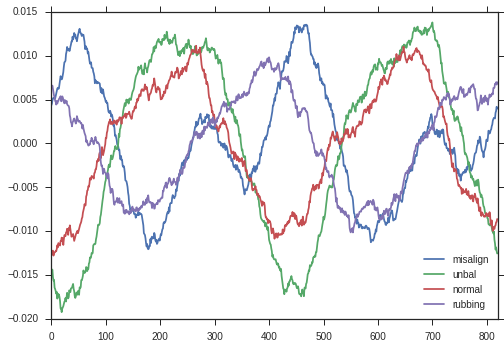

In [9]:
for data_type in ['misalign', 'unbal', 'normal', 'rubbing']:
    X, y = data[data_type]
    plt.plot(X[10,:], label=data_type)
plt.legend(loc = 'lower right')
plt.xlim(0,X1.shape[1])
plt.show()

# 2. Preprocess

- 편의를 위하여 데이터를 하나로 병합하기

In [10]:
import numpy as np

In [11]:
X = np.vstack([X1, X2, X3, X4])
y = np.concatenate([y1, y2, y3, y4])

- 평균을 0으로 맞추기
- 표준편차를 1로 맞추기
- sklearn.preprocessing 에 StandardScaler 이용

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sdc = StandardScaler()
X = sdc.fit_transform(X)

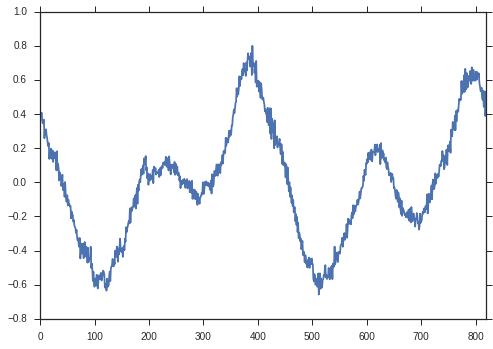

In [14]:
plt.plot(X[100,:])
plt.xlim(0,X.shape[1])
plt.show()

- PCA를 이용하여 feature 추출하기
- 2차원으로 차원 축소
- sklearn.decomposition 에 PCA 이용

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [17]:
print(X.shape)

(1350, 2)


In [18]:
pca.explained_variance_ratio_

array([ 0.11915963,  0.11747344])

- 차원 축소결과 확인

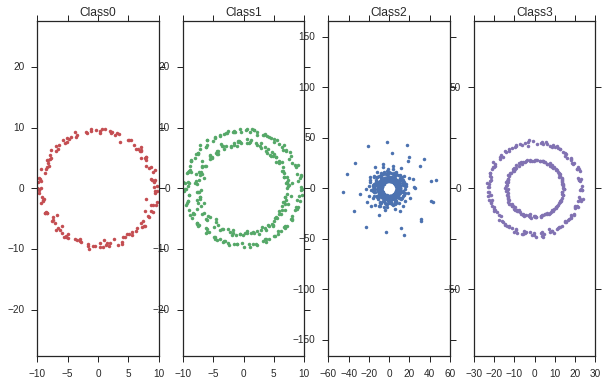

In [19]:
fig = plt.figure(figsize=(10,6))
color = ['r.', 'g.', 'b.', 'm.']
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, title='Class'+str(i))
    ax.plot(X[y==i, 0], X[y==i, 1], color[i])
    plt.axis('equal')
plt.show()

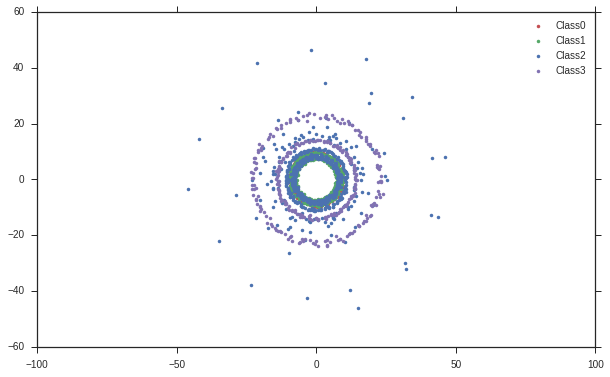

In [20]:
fig = plt.figure(figsize=(10,6))
color = ['r.', 'g.', 'b.', 'm.']
for i in range(4):
    plt.plot(X[y==i, 0], X[y==i, 1], color[i], label='Class'+str(i))
    plt.axis('equal')
plt.legend()
plt.show()

# 3. Data Split

- Training data와 validation data로 나누기
- sklearn.cross_validation에 StratifiedKFold 이용

In [21]:
from sklearn.cross_validation import StratifiedKFold

/home/seungtae/Dropbox/20111659/CoWork/seungtae/TensorFlow/venv2/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
skf = StratifiedKFold(y, n_folds=5)

In [23]:
train_indices, valid_indices = next(iter(skf))
X_train, y_train = X[train_indices, :], y[train_indices]
X_valid, y_valid = X[valid_indices, :], y[valid_indices]

# 4. Classification
- Logistic Regression
- Linear SVM
- Nonlinear SVM

## 4.1. Logistic Regression

- Logistic Regression 모듈 import

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression(C=1.0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

- Validation set으로 성능확인

In [26]:
pred = clf.predict(X_valid)
accuracy = np.mean(np.equal(pred, y_valid))
print('Accuracy = {:.4f}'.format(accuracy))

Accuracy = 0.4444


## 4.2. Linear SVM

- SVC 모듈 import

In [27]:
from sklearn.svm import SVC

In [28]:
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

- Validatioin set으로 성능확인

In [29]:
pred = clf.predict(X_valid)
accuracy = np.mean(np.equal(pred, y_valid))
print('Accuracy = {:.4f}'.format(accuracy))

Accuracy = 0.4444


## 4.3. Nonlinear SVM

- SVC 모듈 import

In [30]:
from sklearn.svm import SVC

In [31]:
clf = SVC(kernel='rbf', C=1.0)
clf.fit(X_train,  y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

- Validation set으로 성능확인

In [32]:
pred = clf.predict(X_valid)
accuracy = np.mean(np.equal(pred, y_valid))
print('Accuracy = {:.4f}'.format(accuracy))

Accuracy = 0.6407


In [33]:
svc = SVC(kernel='linear', C=1).fit(X, y)
rbf_svc = SVC(kernel='rbf', C=1, gamma=1).fit(X, y)

In [34]:
# create a mesh to plot in
h = 1  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

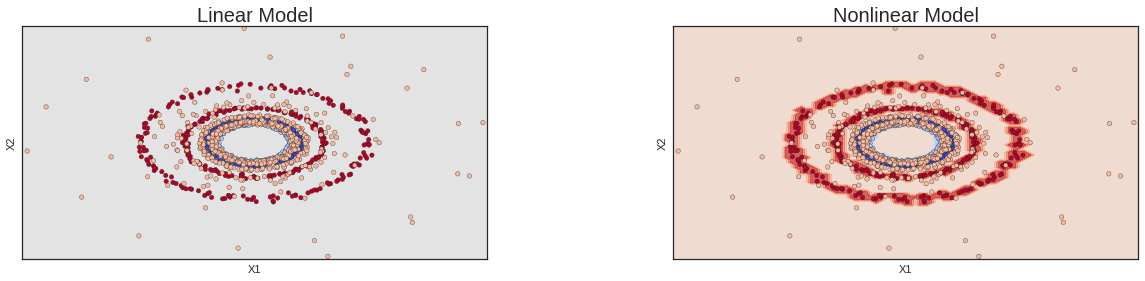

In [39]:
# title for the plots
titles = ['Linear Model', 'Nonlinear Model']

fig = plt.figure(figsize=(20,10))
for i, clf in enumerate((svc, rbf_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i], fontsize=20)

plt.show()

In [36]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>